# Artificial Intelligence II: HW4 Solution - Question 1 👽


## Headers

In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import re
import string
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
nltk.download('stopwords')
import math
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from __future__ import print_function
import scipy
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.nn.functional as F

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# allocate gpu if possible
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print("Device used for running:", device)

Device used for running: cuda


In [3]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 6.7 MB/s 
     |████████████████████████████████| 67 kB 4.4 MB/s 
     |████████████████████████████████| 895 kB 21.0 MB/s 
     |████████████████████████████████| 596 kB 33.4 MB/s 
     |████████████████████████████████| 6.5 MB 31.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Functions for text preprocessing

In this chapter of the notebook, all functions that are relavent to the method of text cleaning, have been implemented.

### Making words with apostrophes into mutiple words

In [4]:
# Dictionary inspired by https://stackoverflow.com/questions/43018030/replace-apostrophe-short-words-in-python
# Making words with apostrophes into mutiple words 
# More friendly for computer to understand the meaning of the phrase

contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "I would",
"i'd've": "I would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": " she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's":  "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def split_words_with_apostrophe (X):

  # punctuation = '"'
  flag = 0
  row = 0
  for tweet in X:
      flag = 0
      # tweet = tweet.translate(str.maketrans('', '', punctuation))
      for word in tweet.split():
          if word.lower() in contractions:
              flag=1
              tweet = tweet.replace(word, contractions[word.lower()])  
      if flag==1:
          X.loc[row] = tweet
      row += 1
  
  return X


### Main text preprocess



1. Lowercase
2. Remove stopwords 
3. Remove url & twitter usernames
4. Keep only letters
5. Delete multiple consecutive spaces
6. Lemmatize




In [5]:
def remove_stopwords(X):
  my_stopwords = stopwords.words('english')
  flag = 0
  row = 0
  for tweet in X:
      flag = 0
      tweet_tokens = word_tokenize(tweet)
      tokens_without_stopwords = []
      for word in tweet_tokens:
        if word not in my_stopwords: 
          tokens_without_stopwords.append(word)
        else: 
          flag = 1
      filtered_tweet = (" ").join(tokens_without_stopwords)
      if flag==1:
          X.loc[row] = filtered_tweet
      row += 1
  return X


def text_preprocess(X):
  
  # Lowercase
  X = X.apply(lambda x: x.lower())
  
  # Remove stopwords
  # https://stackoverflow.com/questions/19560498/faster-way-to-remove-stop-words-in-python
  pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  X = X.apply(lambda x: pattern.sub('', x))

  # Remove url
  X = X.apply(lambda x: re.sub(r'http\S+', ' ', x))

  # Remove tweeter usernames
  X = X.apply(lambda x: re.sub('@[^\s]+',' ',x))

  # Remove words with len equals to 1
  X = X.apply(lambda x: re.sub(r'(?:^| )\w(?:$| )', ' ', x).strip())

  # Keep only letters
  X = X.apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', x))

  # Delete multiple consecutive spaces
  X = X.apply(lambda x: ' '.join(x.split()))

  # Lemmatizing teq
  lemmatizer = WordNetLemmatizer()
  X = X.apply(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in x.rstrip().split()]))

  return X

### Bert text preprocess

In [6]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def text_preprocess_bert(X):
  input_ids, attention_masks = [], []

  for tweet in X:
    encoding_format = tokenizer.encode_plus(
      text=tweet,
      max_length=44,
      add_special_tokens=True, 
      truncation = True, 
      return_token_type_ids=False,
      padding='max_length',
      return_attention_mask=True,
    )

    input_ids.append(encoding_format["input_ids"])
    attention_masks.append(encoding_format["attention_mask"])

  return torch.tensor(input_ids), torch.tensor(attention_masks)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

## Defining Bert Classifier Model

In [7]:
from transformers import BertModel

class bertSentimentClassifier(nn.Module):
  def __init__(self, hidden_dim, output_dim, activation_func):
    super(bertSentimentClassifier, self).__init__()

    self.bertLayers = BertModel.from_pretrained('bert-base-uncased')

    input_dim = self.bertLayers.config.hidden_size # hidden_size = 768
    
    # Linear function 1: glove_size --> hidden_dim
    self.fc1 = nn.Linear(input_dim, hidden_dim) 

    # Non-linearity 1
    self.relu1 = activation_func

    # Linear function 2: hidden_dim --> hidden_dim
    self.fc2 = nn.Linear(hidden_dim, hidden_dim)
    # Non-linearity 2
    self.relu2 = activation_func

    # Linear function 3 (readout): hidden_dim --> 3
    self.fc3 = nn.Linear(hidden_dim, output_dim) 
 
    # for param in self.bertLayers.parameters():
    #   param.requires_grad = False

  def forward(self, input_ids, attention_masks):

    _, x = self.bertLayers(input_ids=input_ids, attention_mask=attention_masks, return_dict=False)

    # Linear function 1
    out = self.fc1(x)

    # Non-linearity 1
    out = self.relu1(out)

    # Linear function 2
    out = self.fc2(out)
    # Non-linearity 2
    out = self.relu2(out)

    # Linear function 3 (readout)
    out = self.fc3(out)

    return out

## Reading train and validation data

<b>NOTE!</b> In order to run the cell below, firstly you have to do the following: 

1.   Create a folder with the name ```Vaccine Sentiment Dataset```.
2.   Upload under that location the files ```vaccine_train_set.csv```, and ```vaccine_validation_set.csv```.

Besides reading in this cell we preprocess and save in ternsors our data...

In [8]:
def make_target(label):
  if label == 0:
    return torch.tensor([1, 0, 0])
  elif label == 1:
    return torch.tensor([0, 1, 0])
  else:
    return torch.tensor([0, 0, 1])

def one_hot_reverse_matrix(data):
  data_size = data.shape[0] 
  # reshaped_data = torch.empty(size=(data_size, 1))
  reshaped_data = torch.ones(data_size).to(device)
  for i in range(data_size):
      if torch.equal(data[i], torch.tensor([1., 0., 0.]).to(device)):
        reshaped_data[i] = torch.tensor([0.])
      elif torch.equal(data[i], torch.tensor([0., 1., 0.]).to(device)):
        reshaped_data[i] = torch.tensor([1.])
      else:
        reshaped_data[i] = torch.tensor([2.])
  return reshaped_data

In [9]:

# Reading vaccine train set and validation set
train_set = pd.read_csv("./Vaccine Sentiment Dataset/vaccine_train_set.csv")
validation_set = pd.read_csv("./Vaccine Sentiment Dataset/vaccine_validation_set.csv")

# Check for null values
# In this case there are no missing values, so no action is needed
if train_set.isnull().values.any()==False and train_set.isnull().values.any()==False:
  print("No missing values in our datasets!\n")  
else:
  train_set = train_set.fillna(0)
  validation_set = validation_set.fillna(0)

# Separate features (inputs) from targets (outputs)
X_train = train_set['tweet'] 
Y_train = train_set['label'].to_numpy().astype('int')
X_validation = validation_set['tweet'] 
Y_validation = validation_set['label'].to_numpy().astype('int')
train_size = X_train.shape[0]
validation_size = X_validation.shape[0] 

# Preprocess train set  
X_train = split_words_with_apostrophe(X_train)
X_train = text_preprocess(X_train)

# Preprocess validation set 
X_validation = split_words_with_apostrophe(X_validation)
X_validation = text_preprocess(X_validation)

# Bert Text Preprocess/Tokenization for validaiton set 
validation_input_ids, validation_attention_masks = text_preprocess_bert(X_validation)
validation_labels = torch.empty(size=(validation_size, 3))
for i in range(validation_size):
    validation_labels[i] = make_target(Y_validation[i])

# Bert Text Preprocess/Tokenization for train set 
train_input_ids, train_attention_masks = text_preprocess_bert(X_train)
train_labels = torch.empty(size=(train_size, 3))
for i in range(train_size):
    train_labels[i] = make_target(Y_train[i])

bert_size = train_input_ids.shape[1]


No missing values in our datasets!



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
print("Train Stats---\nLabel 0:", np.count_nonzero(Y_train == 0), "samples")
print("Label 1:", np.count_nonzero(Y_train == 1), "samples")
print("Label 2:", np.count_nonzero(Y_train == 2), "samples")

print("\nValidation Stats---\nLabel 0:", np.count_nonzero(Y_validation == 0), "samples")
print("Label 1:", np.count_nonzero(Y_validation == 1), "samples")
print("Label 2:", np.count_nonzero(Y_validation == 2), "samples")

Train Stats---
Label 0: 7458 samples
Label 1: 2073 samples
Label 2: 6445 samples

Validation Stats---
Label 0: 1065 samples
Label 1: 296 samples
Label 2: 921 samples


## Train and validate FFNN Model

In [11]:
import torch
torch.manual_seed(0)

# Train and validate our ffnn model
def train_and_validate(model, loss_func, optim, num_epochs, clip, flag):

  train_losses, total_train_loses = [], []
  train_precision_scores, total_train_precision_scores = [], []
  train_f1_scores, total_train_f1_scores = [], []
  train_recall_scores, total_train_recall_scores = [], []
  train_acc, total_train_acc = [], []

  validation_losses, total_validation_loses = [], []
  validation_precision_scores, total_validation_precision_scores = [], []
  validation_f1_scores, total_validation_f1_scores = [], []
  validation_recall_scores, total_validation_recall_scores = [], []
  validation_acc, total_validation_acc = [], []

  validation_predictions = np.empty((0, 3))

  dataset_train = torch.utils.data.TensorDataset(train_input_ids, train_attention_masks, train_labels)
  dataset_validation = torch.utils.data.TensorDataset(validation_input_ids, validation_attention_masks, validation_labels)

  dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=64, shuffle=True)
  dataloader_validation = torch.utils.data.DataLoader(dataset_validation, batch_size=64, shuffle=False)

  for epoch in range(num_epochs):
    train_losses, train_precision_scores, train_f1_scores, train_recall_scores, train_acc = [], [], [], [], []
    validation_losses, validation_precision_scores, validation_f1_scores, validation_recall_scores, validation_acc = [], [], [], [], []
  
    # Train model
    model.train()
    for _, batch in enumerate(dataloader_train):
      batch_input_ids, batch_attention_masks, y_batch = tuple(temp.to(device) for temp in batch)
      y_pred = model(batch_input_ids, batch_attention_masks)

      # Calcualte loss of train data
      if isinstance(loss_func, torch.nn.modules.loss.CrossEntropyLoss) == True:
        loss = loss_func(y_pred.to(device), one_hot_reverse_matrix(y_batch).type(torch.LongTensor).to(device))
      else:
        loss = loss_func(y_pred, y_batch)
      train_losses.append(loss.item())

      optim.zero_grad() #Delete previously stored gradients
      nn.utils.clip_grad_norm_(model.parameters(), clip) # `clip_grad_norm` helps prevent the exploding gradient problem in LSTM/GRU
      loss.backward() #Perform backpropagation starting from the loss calculated in this epoch
      optim.step() #Update model's weights based on the gradients calculated during backprop

      # Reshape predicted and true labels
      # This convertion is necessary for the scoring functions
      y_pred = torch.argmax(y_pred, dim=1).cpu().numpy().reshape(-1,1)
      y_batch = torch.argmax(y_batch, dim=1).cpu().numpy().reshape(-1,1)
      
      # Calculate scores of train data

      score = precision_score(y_batch, y_pred, average='weighted', zero_division=1)
      train_precision_scores.append(score)
      
      score = f1_score(y_batch, y_pred, average='weighted', zero_division=1)
      train_f1_scores.append(score)
      
      score = recall_score(y_batch, y_pred, average='weighted', zero_division=1)
      train_recall_scores.append(score)

      acc = accuracy_score(y_batch, y_pred)
      train_acc.append(acc)
    
    model.eval()
    for _, batch in enumerate(dataloader_validation): 
      # Validate model
      with torch.no_grad():
        batch_input_ids, batch_attention_masks, y_batch = tuple(temp.to(device) for temp in batch)
        y_pred = model(batch_input_ids, batch_attention_masks)

        # Calculate loss of validation data
        if isinstance(loss_func, torch.nn.modules.loss.CrossEntropyLoss) == True:
          loss = loss_func(y_pred.to(device), one_hot_reverse_matrix(y_batch).type(torch.LongTensor).to(device))
        else:
          loss = loss_func(y_pred, y_batch)
        validation_losses.append(loss.item())

        if epoch == num_epochs - 1:
          validation_predictions=np.concatenate((validation_predictions,y_pred.detach().cpu().numpy()))

        y_pred = torch.argmax(y_pred, dim=1).cpu().numpy().reshape(-1,1)
        y_batch = torch.argmax(y_batch, dim=1).cpu().numpy().reshape(-1,1)

        # Calculate scores of validation data

        score = precision_score(y_batch, y_pred, average='weighted', zero_division=1)
        validation_precision_scores.append(score)
        
        score = f1_score(y_batch, y_pred, average='weighted', zero_division=1)
        validation_f1_scores.append(score)
        
        score = recall_score(y_batch, y_pred, average='weighted', zero_division=1)
        validation_recall_scores.append(score)

        acc = accuracy_score(y_batch, y_pred)
        validation_acc.append(acc)
    
    # Add train scores to corresponding lists
    total_train_loses.append(sum(train_losses)/len(dataloader_train))
    total_train_precision_scores.append(sum(train_precision_scores)/len(dataloader_train))
    total_train_f1_scores.append(sum(train_f1_scores)/len(dataloader_train))
    total_train_recall_scores.append(sum(train_recall_scores)/len(dataloader_train))
    total_train_acc.append(sum(train_acc)/len(dataloader_train))

    # Add validation scores to corresponding lists
    total_validation_loses.append(sum(validation_losses)/len(dataloader_validation))
    total_validation_precision_scores.append(sum(validation_precision_scores)/len(dataloader_validation))
    total_validation_f1_scores.append(sum(validation_f1_scores)/len(dataloader_validation))
    total_validation_recall_scores.append(sum(validation_recall_scores)/len(dataloader_validation))
    total_validation_acc.append(sum(validation_acc)/len(dataloader_validation))

    print(f"Epoch {epoch:3}:   Train Loss = {sum(train_losses)/len(dataloader_train):.5f},   Train F1 Score = {sum(train_f1_scores)/len(dataloader_train):.5f},   Validation Loss = {sum(validation_losses)/len(dataloader_validation):.5f},   Validation F1 Score = {sum(validation_f1_scores)/len(dataloader_validation):.5f}")
    # print(f"Epoch {epoch:3}:   Train Loss = {sum(train_losses)/len(dataloader_train):.5f},   Train Prec Score = {sum(train_precision_scores)/len(dataloader_train):.5f},   Validation Loss = {sum(validation_losses)/len(dataloader_validation):.5f},   Validation Prec Score = {sum(validation_precision_scores)/len(dataloader_validation):.5f}")
    # print(f"Epoch {epoch:3}:   Train Loss = {sum(train_losses)/len(dataloader_train):.5f},   Train F1 Score = {sum(train_acc)/len(dataloader_train):.5f},   Validation Loss = {sum(validation_losses)/len(dataloader_validation):.5f},   Validation F1 Score = {sum(validation_acc)/len(dataloader_validation):.5f}")

  print(u'\u2500' * 123)
  print("Train Precision Score =", '{:.5}'.format(sum(train_precision_scores)/len(dataloader_train)))
  print("Train F1 Score =", '{:.5}'.format(sum(train_f1_scores)/len(dataloader_train)))
  print("Train Recall Score =", '{:.5}'.format(sum(train_recall_scores)/len(dataloader_train)))
  print(u'\u2500' * 123)
  print("Validation Precision Score =", '{:.5}'.format(sum(validation_precision_scores)/len(dataloader_validation)))
  print("Validation F1 Score =", '{:.5}'.format(sum(validation_f1_scores)/len(dataloader_validation)))
  print("Validation Recall Score =", '{:.5}'.format(sum(validation_recall_scores)/len(dataloader_validation)))
  print("\n")

  # print(u'\u2500' * 123, "\n")

  make_plots([i for i in range(num_epochs)], total_train_loses, total_train_f1_scores, total_validation_loses, total_validation_f1_scores)
  # make_plots([i for i in range(num_epochs)], total_train_loses, total_train_precision_scores, total_validation_loses, total_validation_precision_scores)
  # make_plots([i for i in range(num_epochs)], total_train_loses, total_train_acc, total_validation_loses, total_validation_acc)

  # Roc curve plot only for best model
  if flag == 1:
    print("\n")
    make_roc_curve(validation_predictions,validation_labels.numpy())

## Custom GridSearch function

In [12]:

# Grid function that iterates through different parameters, and for each model outputs some scores and plots
def myGridSearch(activation_functions, hidden_layers, loss_functions, optimizers, hidden_dimensions, learning_rates, grad_clips, flag):
  grid_counter = 0
  output_dim = 3

  for activation_func in activation_functions: # Iterate through activation functions
    for hidden_dim in hidden_dimensions: # Iterate through hidden dimensions of each layer
      for hidden_layer in hidden_layers: # Iterate through hidden layers
        for learning_rate in learning_rates: # Iterate through learning rates
          for loss_func in loss_functions: # Iterate through loss functions      
            for optimizer in optimizers: # Iterate through optimizers
              for grad_clip in grad_clips:

                # # If cross entropy loss is used inform ffnn not to call softmax again
                # if isinstance(loss_func, torch.nn.modules.loss.CrossEntropyLoss) == True:
                  # initialize model
                # if hidden_layer == 1:
                bert_classifier_model = bertSentimentClassifier(hidden_dim, output_dim, activation_func).to(device)  
                

                # Initialize optimizer
                if optimizer == 'SGD':
                  optim = torch.optim.SGD(bert_classifier_model.parameters(), lr=learning_rate)
                elif optimizer == 'Adadelta':
                  optim = torch.optim.Adadelta(bert_classifier_model.parameters(), lr=learning_rate)
                else:
                  optim = torch.optim.Adam(bert_classifier_model.parameters(), lr=learning_rate)

                grid_counter += 1

                print()
                print('*' * 123)
                print(' ' * 52, 'Grid Search:', grid_counter)
                print('*' * 123)
                print("Bert Model", "\nLoss Function:", loss_func, "\nOptimizer:", type (optim), "\nActivation Function:", activation_func, "\nHidden Layers:", hidden_layer, "\nHidden Dimensions:", hidden_dim, "\nLearning Rate:", learning_rate, "\nGradient Clipping:", grad_clip)
                print(u'\u2500' * 123)

                # Train and validate model
                num_epochs = 3
                train_and_validate(bert_classifier_model, loss_func, optim, num_epochs , grad_clip, flag)

## Plots and Roc Curve

In [13]:
# Make "loss vs epochs" and "acc vs epochs" plots
def make_plots(num_epochs, train_losses, train_accuracies, validation_losses, validation_accuracies):
  fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(11, 5))
  fig.tight_layout(pad=5.0)
  
  plt1.plot(num_epochs, train_losses, color='blue', label='Training Loss')
  plt1.plot(num_epochs, validation_losses, color='green', label='Validation Loss')
  plt1.set_title('Loss vs Epochs')
  plt1.set_xlabel('Num of Epochs')
  plt1.set_ylabel('Model Loss')
  plt1.legend()
  plt1.grid()
  plt1.legend(loc='lower left')

  plt2.plot(num_epochs, train_accuracies, color='blue', label='Training Accuracy')
  plt2.plot(num_epochs, validation_accuracies, color='green', label='Validation Accuracy')
  plt2.set_title('Accuracy vs Epochs')
  plt2.set_xlabel('Num of Epochs')
  plt2.set_ylabel('Model Accuracy')
  plt2.legend()
  plt2.grid()
  plt2.legend(loc='lower right')

  plt.show()

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Roc curve plot
# https://stackoverflow.com/questions/45641409/computing-scikit-learn-multiclass-roc-curve-with-cross-validation-cv
def make_roc_curve(y_predict , y_real):
    n_classes = y_real.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_real[:, i], y_predict[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = ['blue', 'red', 'green']
    plt.figure(figsize=[11,5])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    
    plt.show()

## Experimenting

Experimenting with:


1.  Hidden dimensions of feed forward model
2.  Learning rates
3.  Gradient Clipping

Conclusions:

* For 3 epochs, higher learning rate works better, especially if hidden size numer is low.
* No need for more epochs, because bert model seems to learn fast. Also each epoch takes some time (around 5-7 minutes), in order our model to train.
* Best results for lr=0.00001 and grad_clipping=1, hidden_dimensions=50 or 100 

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



***************************************************************************************************************************
                                                     Grid Search: 1
***************************************************************************************************************************
Bert Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 50 
Learning Rate: 1e-05 
Gradient Clipping: 1
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.87319,   Train F1 Score = 0.53032,   Validation Loss = 0.72514,   Validation F1 Score = 0.65126
Epoch   1:   Train Loss = 0.68158,   Train F1 Score = 0.69242,   Validation Loss = 0.66761,   Validation F1 Score = 0.70815
Epoch   2:   Train Loss = 0.59642,   Train F1 Score = 0.76143,   Validation Loss = 0.64716,   Validation F1

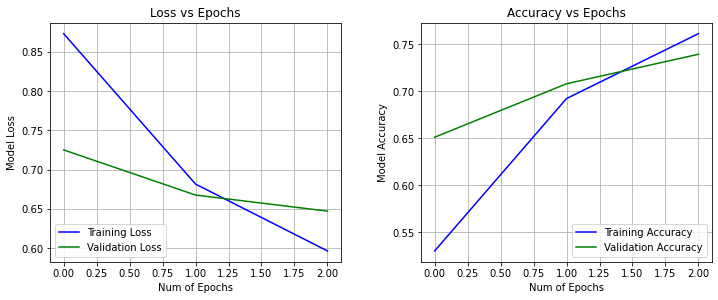

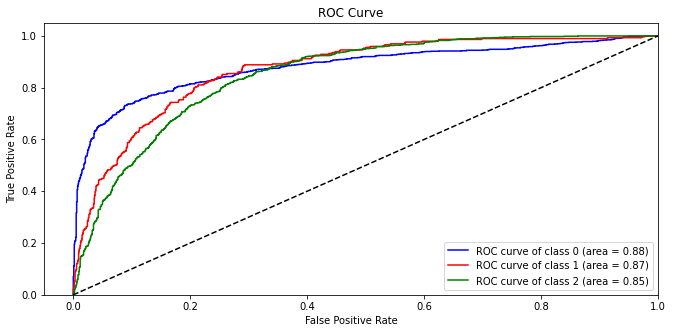

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



***************************************************************************************************************************
                                                     Grid Search: 2
***************************************************************************************************************************
Bert Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 50 
Learning Rate: 1e-05 
Gradient Clipping: 5
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.89267,   Train F1 Score = 0.55557,   Validation Loss = 0.77640,   Validation F1 Score = 0.64390
Epoch   1:   Train Loss = 0.71882,   Train F1 Score = 0.66520,   Validation Loss = 0.69976,   Validation F1 Score = 0.65114
Epoch   2:   Train Loss = 0.63617,   Train F1 Score = 0.70731,   Validation Loss = 0.66148,   Validation F1

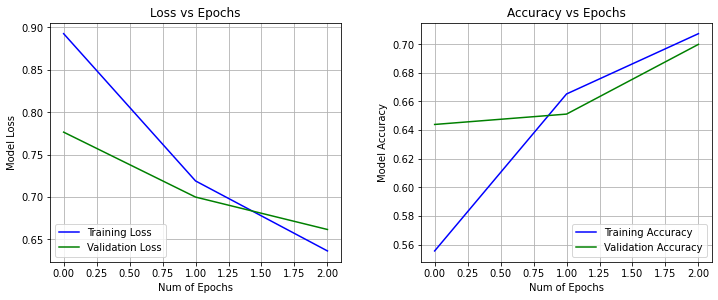

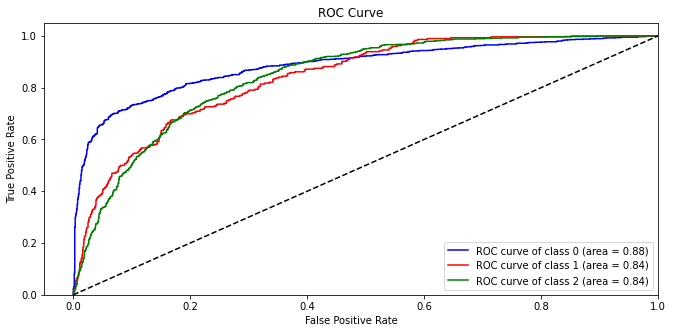

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



***************************************************************************************************************************
                                                     Grid Search: 3
***************************************************************************************************************************
Bert Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 50 
Learning Rate: 1e-05 
Gradient Clipping: 10
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.90557,   Train F1 Score = 0.57436,   Validation Loss = 0.78172,   Validation F1 Score = 0.64864
Epoch   1:   Train Loss = 0.72634,   Train F1 Score = 0.67237,   Validation Loss = 0.72187,   Validation F1 Score = 0.65388
Epoch   2:   Train Loss = 0.64871,   Train F1 Score = 0.70092,   Validation Loss = 0.68660,   Validation F

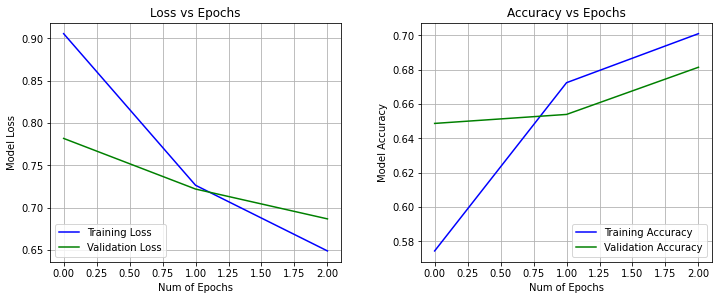

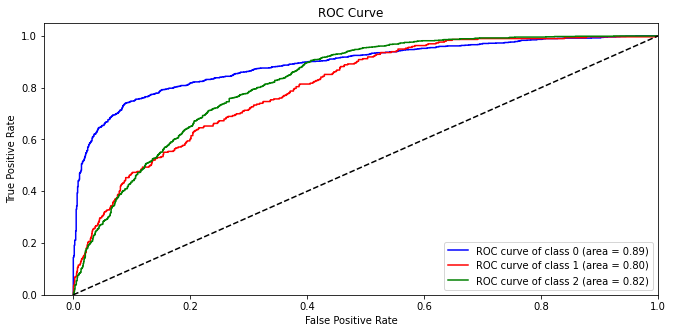

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



***************************************************************************************************************************
                                                     Grid Search: 4
***************************************************************************************************************************
Bert Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 50 
Learning Rate: 5e-06 
Gradient Clipping: 1
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.98775,   Train F1 Score = 0.54324,   Validation Loss = 0.89098,   Validation F1 Score = 0.64874
Epoch   1:   Train Loss = 0.83447,   Train F1 Score = 0.65917,   Validation Loss = 0.79309,   Validation F1 Score = 0.65612
Epoch   2:   Train Loss = 0.74488,   Train F1 Score = 0.67719,   Validation Loss = 0.74334,   Validation F1

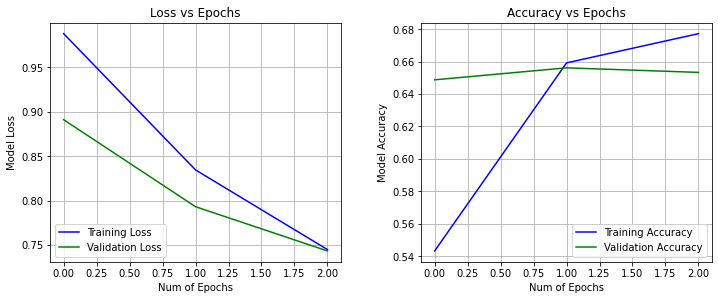

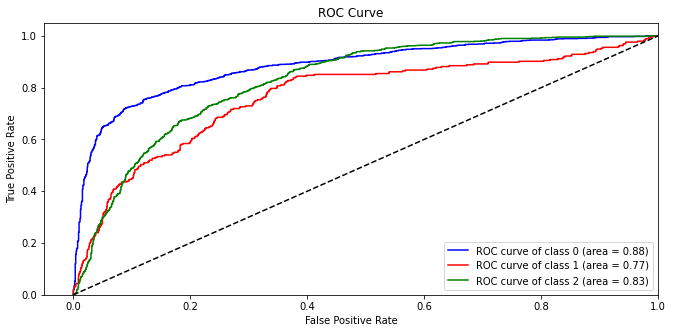

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



***************************************************************************************************************************
                                                     Grid Search: 5
***************************************************************************************************************************
Bert Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 50 
Learning Rate: 5e-06 
Gradient Clipping: 5
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.99744,   Train F1 Score = 0.52358,   Validation Loss = 0.88796,   Validation F1 Score = 0.63729
Epoch   1:   Train Loss = 0.81735,   Train F1 Score = 0.65258,   Validation Loss = 0.76674,   Validation F1 Score = 0.64736
Epoch   2:   Train Loss = 0.72155,   Train F1 Score = 0.67427,   Validation Loss = 0.72266,   Validation F1

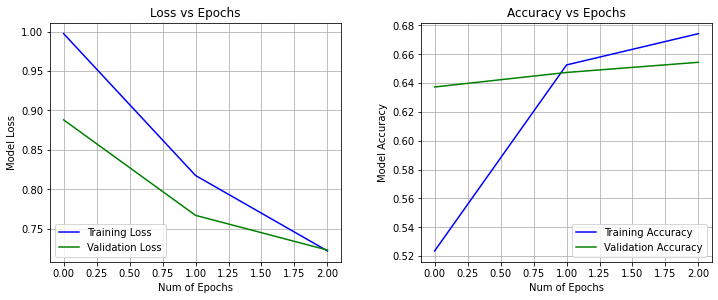

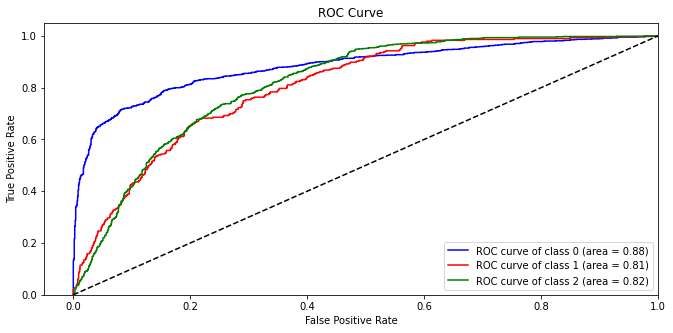

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



***************************************************************************************************************************
                                                     Grid Search: 6
***************************************************************************************************************************
Bert Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 50 
Learning Rate: 5e-06 
Gradient Clipping: 10
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.99881,   Train F1 Score = 0.49156,   Validation Loss = 0.85203,   Validation F1 Score = 0.64061
Epoch   1:   Train Loss = 0.78076,   Train F1 Score = 0.65782,   Validation Loss = 0.72282,   Validation F1 Score = 0.69039
Epoch   2:   Train Loss = 0.68770,   Train F1 Score = 0.71158,   Validation Loss = 0.68260,   Validation F

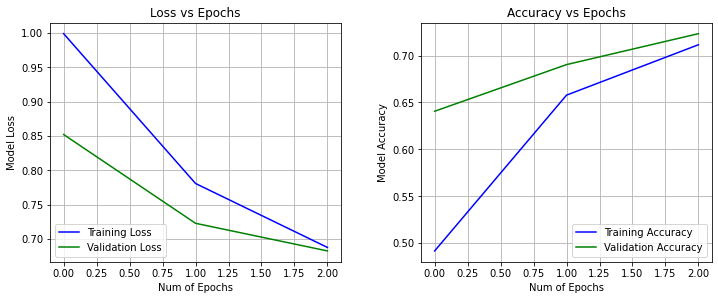

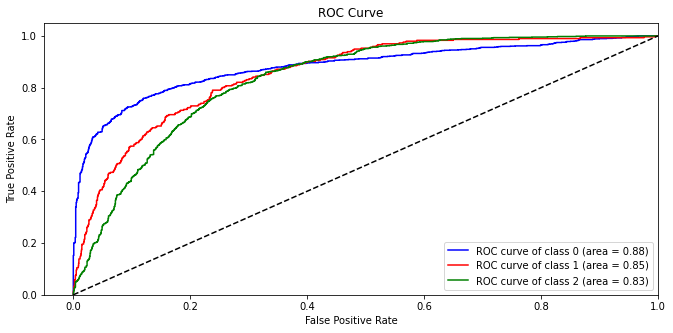

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



***************************************************************************************************************************
                                                     Grid Search: 7
***************************************************************************************************************************
Bert Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 100 
Learning Rate: 1e-05 
Gradient Clipping: 1
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.85673,   Train F1 Score = 0.58970,   Validation Loss = 0.72714,   Validation F1 Score = 0.65267
Epoch   1:   Train Loss = 0.68388,   Train F1 Score = 0.67794,   Validation Loss = 0.66715,   Validation F1 Score = 0.67967
Epoch   2:   Train Loss = 0.60508,   Train F1 Score = 0.74679,   Validation Loss = 0.66220,   Validation F

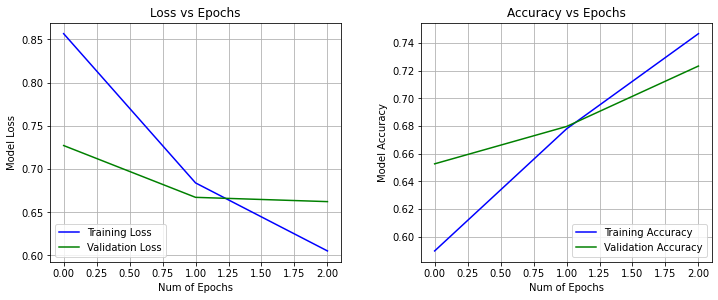

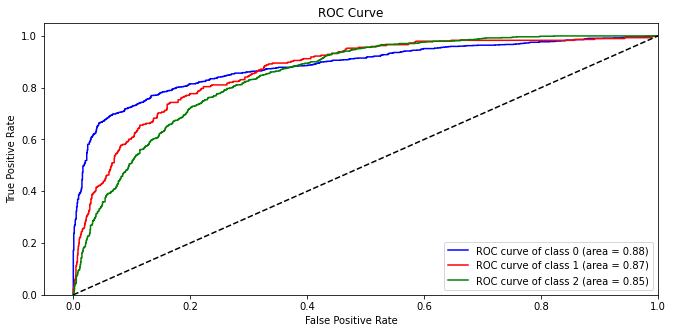

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



***************************************************************************************************************************
                                                     Grid Search: 8
***************************************************************************************************************************
Bert Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 100 
Learning Rate: 1e-05 
Gradient Clipping: 5
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.87469,   Train F1 Score = 0.56975,   Validation Loss = 0.73795,   Validation F1 Score = 0.65266
Epoch   1:   Train Loss = 0.69406,   Train F1 Score = 0.68753,   Validation Loss = 0.68818,   Validation F1 Score = 0.70246
Epoch   2:   Train Loss = 0.61678,   Train F1 Score = 0.75333,   Validation Loss = 0.66946,   Validation F

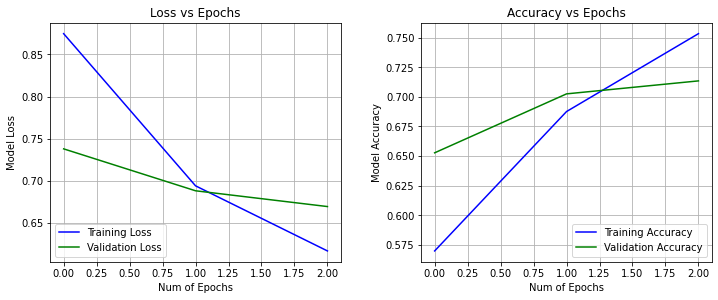

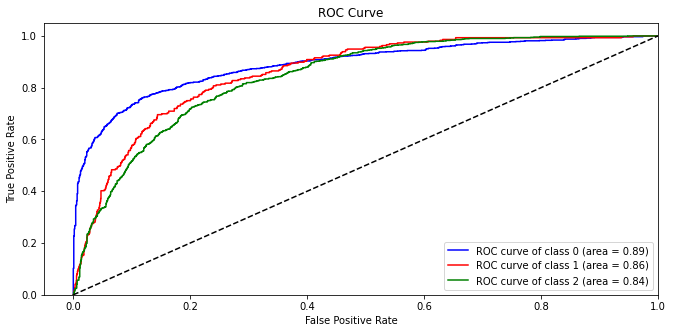

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



***************************************************************************************************************************
                                                     Grid Search: 9
***************************************************************************************************************************
Bert Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 100 
Learning Rate: 1e-05 
Gradient Clipping: 10
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.86924,   Train F1 Score = 0.61495,   Validation Loss = 0.72915,   Validation F1 Score = 0.66437
Epoch   1:   Train Loss = 0.67688,   Train F1 Score = 0.70924,   Validation Loss = 0.71103,   Validation F1 Score = 0.67906
Epoch   2:   Train Loss = 0.59693,   Train F1 Score = 0.76188,   Validation Loss = 0.65949,   Validation 

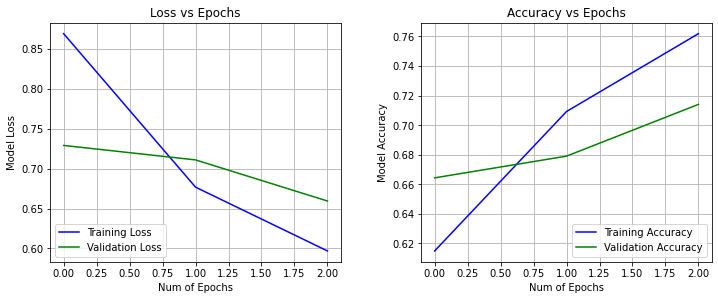

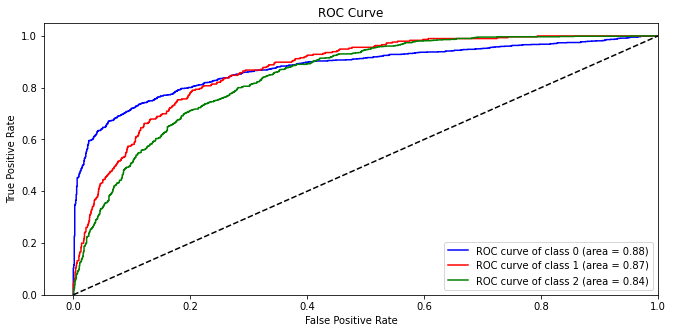

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



***************************************************************************************************************************
                                                     Grid Search: 10
***************************************************************************************************************************
Bert Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 100 
Learning Rate: 5e-06 
Gradient Clipping: 1
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.92584,   Train F1 Score = 0.56553,   Validation Loss = 0.80402,   Validation F1 Score = 0.65001
Epoch   1:   Train Loss = 0.75627,   Train F1 Score = 0.65918,   Validation Loss = 0.73187,   Validation F1 Score = 0.64569
Epoch   2:   Train Loss = 0.68309,   Train F1 Score = 0.68426,   Validation Loss = 0.72711,   Validation 

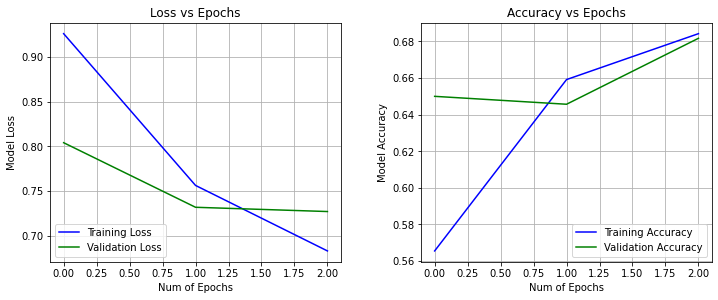

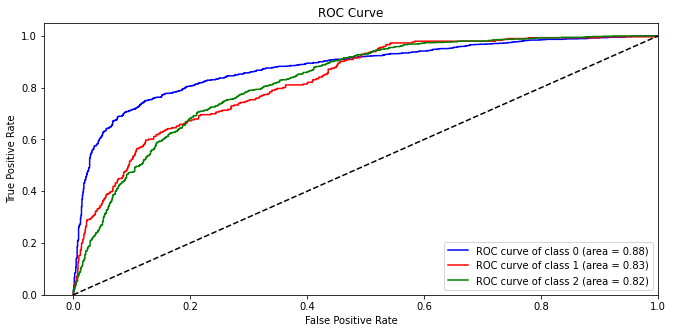

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



***************************************************************************************************************************
                                                     Grid Search: 11
***************************************************************************************************************************
Bert Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 100 
Learning Rate: 5e-06 
Gradient Clipping: 5
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.97130,   Train F1 Score = 0.53757,   Validation Loss = 0.84511,   Validation F1 Score = 0.64212


In [ ]:
activation_functions = [nn.ReLU()]
hidden_layers = [1]
loss_functions = [nn.CrossEntropyLoss()]
optimizers = ['Adam']
hidden_dimensions = [50, 100]
learning_rates = [0.00001, 0.000005]
grad_clips = [1, 5, 10]

myGridSearch(activation_functions, hidden_layers, loss_functions, optimizers, hidden_dimensions, learning_rates, grad_clips, 1)

Remainings of previous grid search because it was interrupted due to cpu usage limits

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



***************************************************************************************************************************
                                                     Grid Search: 1
***************************************************************************************************************************
Bert Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 100 
Learning Rate: 5e-06 
Gradient Clipping: 5
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.93126,   Train F1 Score = 0.50693,   Validation Loss = 0.80819,   Validation F1 Score = 0.63304
Epoch   1:   Train Loss = 0.76016,   Train F1 Score = 0.65095,   Validation Loss = 0.72831,   Validation F1 Score = 0.64872
Epoch   2:   Train Loss = 0.69550,   Train F1 Score = 0.66961,   Validation Loss = 0.68552,   Validation F

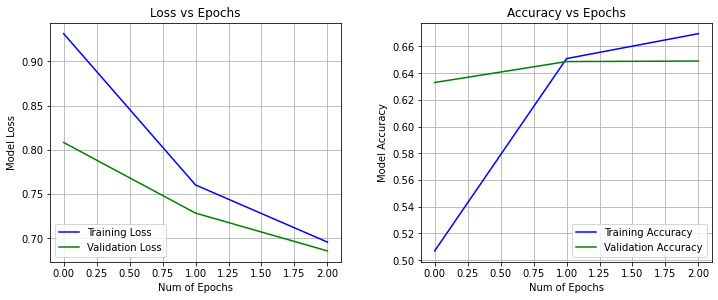

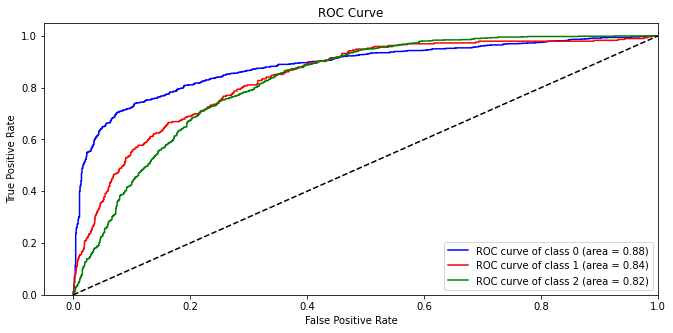

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



***************************************************************************************************************************
                                                     Grid Search: 2
***************************************************************************************************************************
Bert Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 100 
Learning Rate: 5e-06 
Gradient Clipping: 10
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.93281,   Train F1 Score = 0.53841,   Validation Loss = 0.79921,   Validation F1 Score = 0.64427
Epoch   1:   Train Loss = 0.74699,   Train F1 Score = 0.65813,   Validation Loss = 0.71046,   Validation F1 Score = 0.65440
Epoch   2:   Train Loss = 0.67492,   Train F1 Score = 0.69391,   Validation Loss = 0.67129,   Validation 

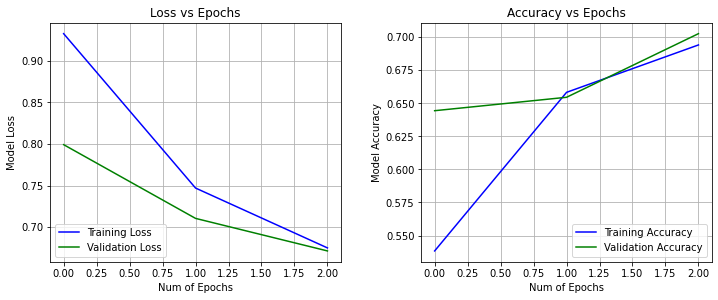

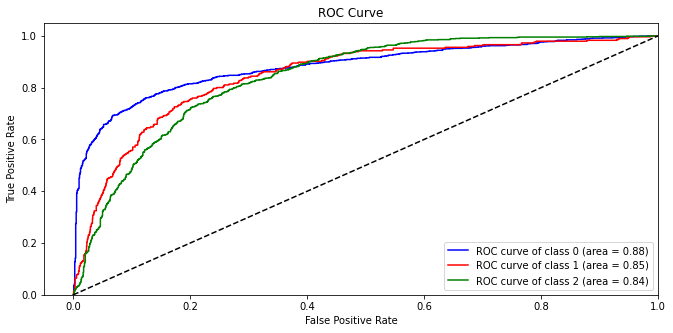

In [14]:
activation_functions = [nn.ReLU()]
hidden_layers = [1]
loss_functions = [nn.CrossEntropyLoss()]
optimizers = ['Adam']
hidden_dimensions = [100]
learning_rates = [0.000005]
grad_clips = [5, 10]

myGridSearch(activation_functions, hidden_layers, loss_functions, optimizers, hidden_dimensions, learning_rates, grad_clips, 1)

### Best Model

In general, all experimetns led to good results, excepts some occasions where lr=0.000005 was used. <br>
The best model had the following hyperparameters:

* activation_functions = [nn.ReLU()]
* hidden_layers = [1]
* loss_functions = [nn.CrossEntropyLoss()]
* optimizers = ['Adam']
* hidden_dimensions = [100]
* learning_rates = [0.00001]
* grad_clips = [1]


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



***************************************************************************************************************************
                                                     Grid Search: 1
***************************************************************************************************************************
Bert Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 100 
Learning Rate: 1e-05 
Gradient Clipping: 1
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.91122,   Train F1 Score = 0.61026,   Validation Loss = 0.77209,   Validation F1 Score = 0.65618
Epoch   1:   Train Loss = 0.69966,   Train F1 Score = 0.70146,   Validation Loss = 0.66971,   Validation F1 Score = 0.71401
Epoch   2:   Train Loss = 0.60064,   Train F1 Score = 0.76257,   Validation Loss = 0.65202,   Validation F

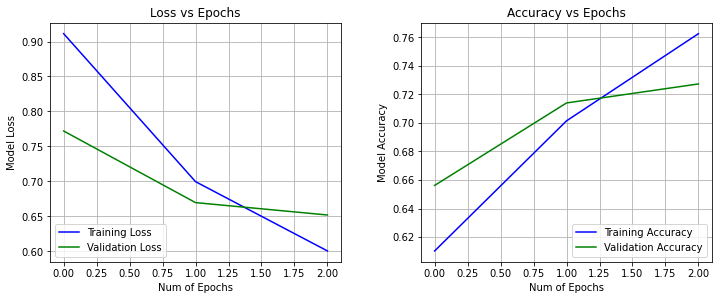

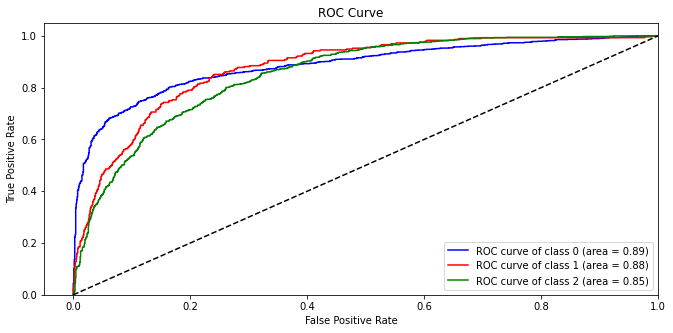

In [25]:
activation_functions = [nn.ReLU()]
hidden_layers = [1]
loss_functions = [nn.CrossEntropyLoss()]
optimizers = ['Adam']
hidden_dimensions = [100]
learning_rates = [0.00001]
grad_clips = [1]

myGridSearch(activation_functions, hidden_layers, loss_functions, optimizers, hidden_dimensions, learning_rates, grad_clips, 1)

## Test set section

### Training and testing

In [21]:
import torch
torch.manual_seed(0)

# Train and validate our ffnn model
def train_model_and_test():

  train_losses, total_train_loses = [], []
  train_precision_scores, total_train_precision_scores = [], []
  train_f1_scores, total_train_f1_scores = [], []
  train_recall_scores, total_train_recall_scores = [], []
  train_acc, total_train_acc = [], []

  test_losses, total_test_loses = [], []
  test_precision_scores, total_test_precision_scores = [], []
  test_f1_scores, total_test_f1_scores = [], []
  test_recall_scores, total_test_recall_scores = [], []
  test_acc, total_test_acc = [], []

  test_predictions = np.empty((0, 3))

  # Parameters of best model
  output_dim = 3
  hidden_dim = 100
  learning_rate = 0.00001
  activation_func = nn.ReLU()
  loss_func = nn.CrossEntropyLoss()
  num_epochs = 3
  clip = 1

  model = bertSentimentClassifier(hidden_dim, output_dim, activation_func).to(device)  
  optim = torch.optim.Adam(model.parameters(), lr=learning_rate)

  print()
  print("Best Model - Bert", "\nLoss Function:", loss_func, "\nOptimizer:", type (optim), "\nActivation Function:", activation_func, "\nHidden Layers: 1", "\nHidden Dimensions:", hidden_dim, "\nLearning Rate:", learning_rate, "\nGradient Clipping:", clip)
  print()

  dataset_train = torch.utils.data.TensorDataset(train_input_ids, train_attention_masks, train_labels)
  dataset_test = torch.utils.data.TensorDataset(test_input_ids, test_attention_masks, test_labels)
  dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=64, shuffle=True)
  dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=64, shuffle=False)

  for epoch in range(num_epochs):
    train_losses, train_precision_scores, train_f1_scores, train_recall_scores, train_acc = [], [], [], [], []
    test_losses, test_precision_scores, test_f1_scores, test_recall_scores, test_acc = [], [], [], [], []
  
    # Train model
    model.train()
    for _, batch in enumerate(dataloader_train):
      batch_input_ids, batch_attention_masks, y_batch = tuple(temp.to(device) for temp in batch)
      y_pred = model(batch_input_ids, batch_attention_masks)

      # Calcualte loss of train data
      if isinstance(loss_func, torch.nn.modules.loss.CrossEntropyLoss) == True:
        loss = loss_func(y_pred.to(device), one_hot_reverse_matrix(y_batch).type(torch.LongTensor).to(device))
      else:
        loss = loss_func(y_pred, y_batch)
      train_losses.append(loss.item())

      optim.zero_grad() #Delete previously stored gradients
      nn.utils.clip_grad_norm_(model.parameters(), clip) # `clip_grad_norm` helps prevent the exploding gradient problem in LSTM/GRU
      loss.backward() #Perform backpropagation starting from the loss calculated in this epoch
      optim.step() #Update model's weights based on the gradients calculated during backprop

      # Reshape predicted and true labels
      # This convertion is necessary for the scoring functions
      y_pred = torch.argmax(y_pred, dim=1).cpu().numpy().reshape(-1,1)
      y_batch = torch.argmax(y_batch, dim=1).cpu().numpy().reshape(-1,1)
      
      # Calculate scores of train data

      score = precision_score(y_batch, y_pred, average='weighted', zero_division=1)
      train_precision_scores.append(score)
      
      score = f1_score(y_batch, y_pred, average='weighted', zero_division=1)
      train_f1_scores.append(score)
      
      score = recall_score(y_batch, y_pred, average='weighted', zero_division=1)
      train_recall_scores.append(score)

      acc = accuracy_score(y_batch, y_pred)
      train_acc.append(acc)
    
    model.eval()
    for _, batch in enumerate(dataloader_test): 
      # test model
      with torch.no_grad():
        batch_input_ids, batch_attention_masks, y_batch = tuple(temp.to(device) for temp in batch)
        y_pred = model(batch_input_ids, batch_attention_masks)

        # Calculate loss of test data
        if isinstance(loss_func, torch.nn.modules.loss.CrossEntropyLoss) == True:
          loss = loss_func(y_pred.to(device), one_hot_reverse_matrix(y_batch).type(torch.LongTensor).to(device))
        else:
          loss = loss_func(y_pred, y_batch)
        test_losses.append(loss.item())

        if epoch == num_epochs - 1:
          test_predictions=np.concatenate((test_predictions,y_pred.detach().cpu().numpy()))

        y_pred = torch.argmax(y_pred, dim=1).cpu().numpy().reshape(-1,1)
        y_batch = torch.argmax(y_batch, dim=1).cpu().numpy().reshape(-1,1)

        # Calculate scores of test data

        score = precision_score(y_batch, y_pred, average='weighted', zero_division=1)
        test_precision_scores.append(score)
        
        score = f1_score(y_batch, y_pred, average='weighted', zero_division=1)
        test_f1_scores.append(score)
        
        score = recall_score(y_batch, y_pred, average='weighted', zero_division=1)
        test_recall_scores.append(score)

        acc = accuracy_score(y_batch, y_pred)
        test_acc.append(acc)
    
    # Add train scores to corresponding lists
    total_train_loses.append(sum(train_losses)/len(dataloader_train))
    total_train_precision_scores.append(sum(train_precision_scores)/len(dataloader_train))
    total_train_f1_scores.append(sum(train_f1_scores)/len(dataloader_train))
    total_train_recall_scores.append(sum(train_recall_scores)/len(dataloader_train))
    total_train_acc.append(sum(train_acc)/len(dataloader_train))

    # Add test scores to corresponding lists
    total_test_loses.append(sum(test_losses)/len(dataloader_test))
    total_test_precision_scores.append(sum(test_precision_scores)/len(dataloader_test))
    total_test_f1_scores.append(sum(test_f1_scores)/len(dataloader_test))
    total_test_recall_scores.append(sum(test_recall_scores)/len(dataloader_test))
    total_test_acc.append(sum(test_acc)/len(dataloader_test))

    print(f"Epoch {epoch:3}:   Train Loss = {sum(train_losses)/len(dataloader_train):.5f},   Train F1 Score = {sum(train_f1_scores)/len(dataloader_train):.5f},   Test Loss = {sum(test_losses)/len(dataloader_test):.5f},   test F1 Score = {sum(test_f1_scores)/len(dataloader_test):.5f}")
    # print(f"Epoch {epoch:3}:   Train Loss = {sum(train_losses)/len(dataloader_train):.5f},   Train Prec Score = {sum(train_precision_scores)/len(dataloader_train):.5f},   test Loss = {sum(test_losses)/len(dataloader_test):.5f},   test Prec Score = {sum(test_precision_scores)/len(dataloader_test):.5f}")
    # print(f"Epoch {epoch:3}:   Train Loss = {sum(train_losses)/len(dataloader_train):.5f},   Train F1 Score = {sum(train_acc)/len(dataloader_train):.5f},   test Loss = {sum(test_losses)/len(dataloader_test):.5f},   test F1 Score = {sum(test_acc)/len(dataloader_test):.5f}")

  print(u'\u2500' * 123)
  print("Train Precision Score =", '{:.5}'.format(sum(train_precision_scores)/len(dataloader_train)))
  print("Train F1 Score =", '{:.5}'.format(sum(train_f1_scores)/len(dataloader_train)))
  print("Train Recall Score =", '{:.5}'.format(sum(train_recall_scores)/len(dataloader_train)))
  print(u'\u2500' * 123)
  print("Validation Precision Score =", '{:.5}'.format(sum(test_precision_scores)/len(dataloader_test)))
  print("test F1 Score =", '{:.5}'.format(sum(test_f1_scores)/len(dataloader_test)))
  print("test Recall Score =", '{:.5}'.format(sum(test_recall_scores)/len(dataloader_test)))
  print("\n")

  # print(u'\u2500' * 123, "\n")

  make_plots([i for i in range(num_epochs)], total_train_loses, total_train_f1_scores, total_test_loses, total_test_f1_scores)
  # make_plots([i for i in range(num_epochs)], total_train_loses, total_train_precision_scores, total_test_loses, total_test_precision_scores)
  # make_plots([i for i in range(num_epochs)], total_train_loses, total_train_acc, total_test_loses, total_test_acc)


  print("\n")
  make_roc_curve(test_predictions,test_labels.numpy())

### Reading data, printing results
<b>NOTE!</b> In order to run the cell below, firstly you have to do the following: 

1.   Upload your test set under the folder ```Vaccine Sentiment Dataset```.
3.   Change the path in the line ```test_set = pd.read_csv("./Vaccine Sentiment Dataset/vaccine_test_set.csv")```, if needed.

In [ ]:
# Read test set 
######## IMPORTANT: Give your path #########
test_set = pd.read_csv("./Vaccine Sentiment Dataset/vaccine_test_set.csv")

# Separate features (inputs) from targets (outputs)
X_test = test_set['tweet'] 
Y_test = test_set['label'].to_numpy().astype('int')

# Text Preprocess test set 
X_test = split_words_with_apostrophe(X_test)
X_test = text_preprocess(X_test)
test_size = X_test.shape[0] 

In [ ]:
# Bert text preprocess and saving in tensors
test_input_ids, test_attention_masks = text_preprocess_bert(X_test)
test_labels = torch.empty(size=(test_size, 3))
for i in range(test_size):
    test_labels[i] = make_target(Y_test[i])

# Train and output results for test set
train_model_and_test()